In [1]:
from IPython.display import Audio
filename = "/home/work/a1003/db/NIA2019_KSPONSPEECH/eval_clean/KsponSpeech_E00001.wav"
#filename = "/home/work/a1003/db/NIA2019_KSPONSPEECH/KsponSpeech_01/KsponSpeech_0001/KsponSpeech_000003.wav"
Audio(filename, autoplay=False)

In [2]:
import librosa
samples, sampling_rate = librosa.load(filename, sr=None)
len(samples), sampling_rate

(256544, 16000)

<IPython.core.display.Javascript object>


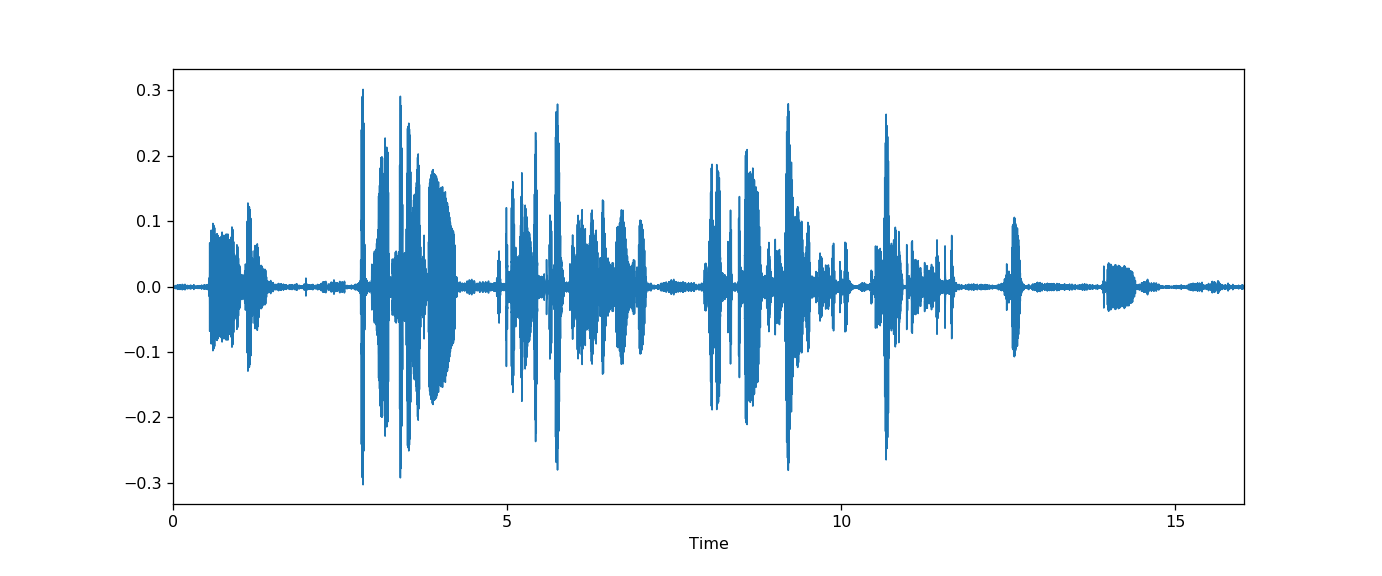

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams["figure.figsize"]=12,5
from librosa import display
import numpy as np
plt.figure()
librosa.display.waveplot(y = samples, sr = sampling_rate)
plt.show()

<IPython.core.display.Javascript object>


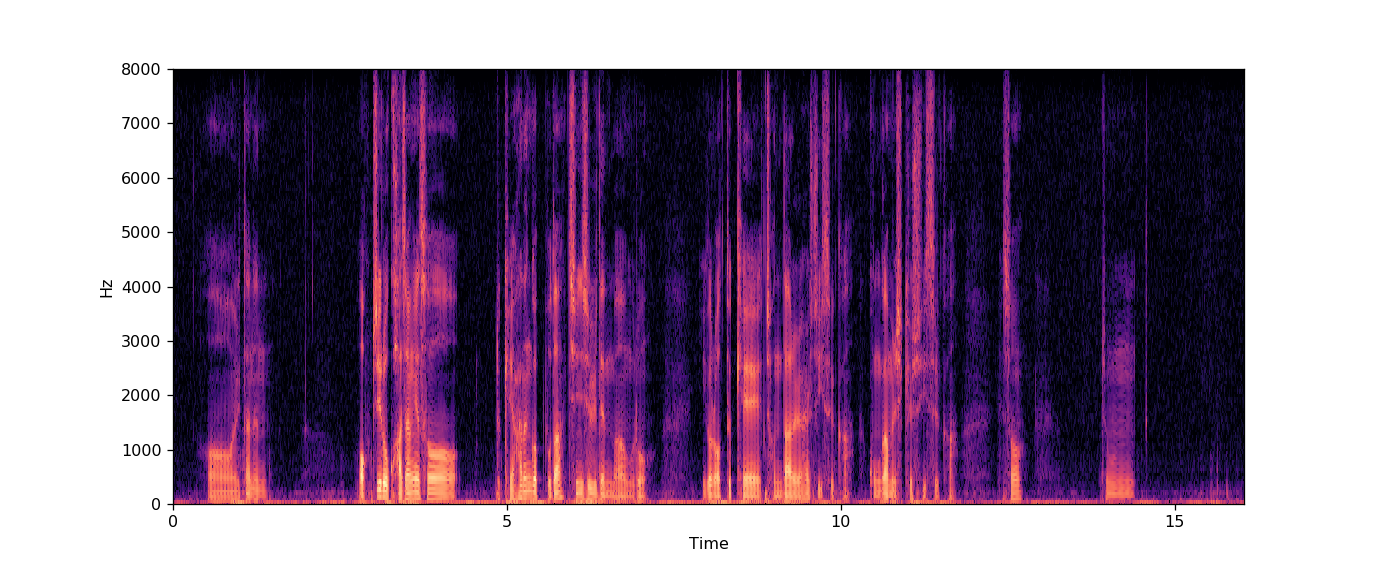

In [4]:
hop_length = 160 
n_fft = 320

stft = librosa.stft(samples, n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)**2
log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

plt.figure()
librosa.display.specshow(log_spectrogram, sr=sampling_rate, hop_length=hop_length, y_axis="hz", x_axis="time")


<IPython.core.display.Javascript object>


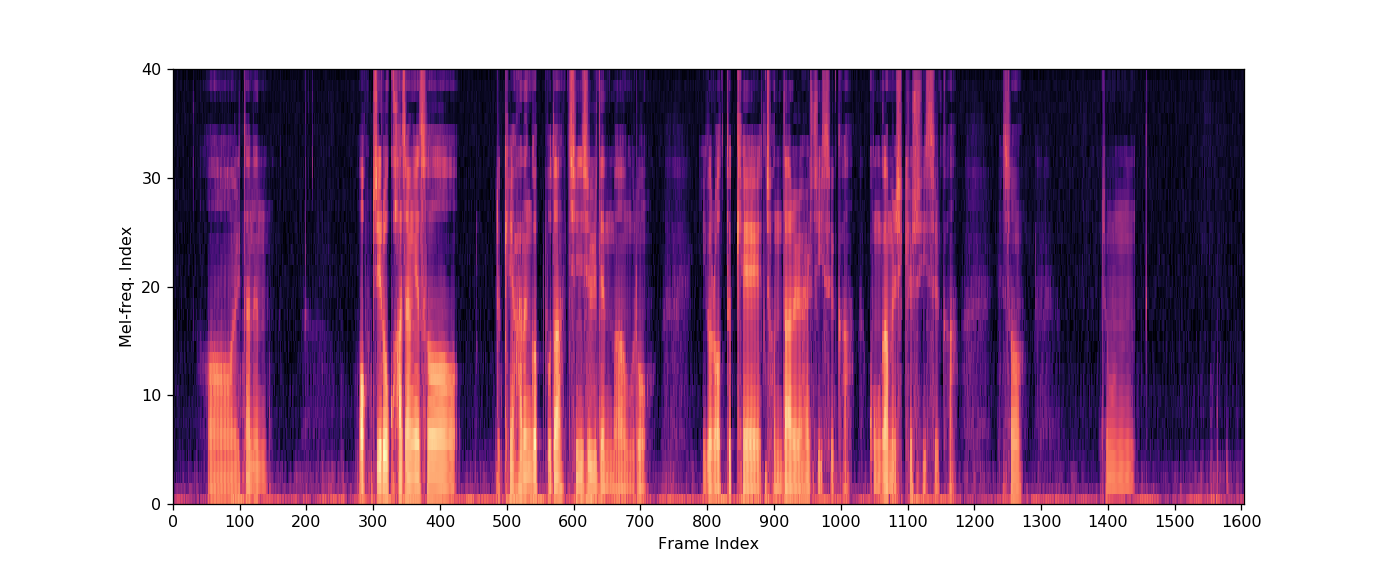

Text(0.5, 0, 'Frame Index')

In [5]:
hop_length = 160 
n_fft = 320
n_mels = 40

S = librosa.feature.melspectrogram(y=samples, sr=sampling_rate, hop_length=hop_length, n_fft=n_fft, n_mels = n_mels, fmin=0.0, fmax=None)
S_dB = librosa.power_to_db(S, ref=np.max)
dim_feature, len_feature = S_dB.shape
fig = plt.figure()
librosa.display.specshow(S_dB, y_axis=None, x_axis=None)
fig.gca().set_yticks(range(0, dim_feature+1, 10))
fig.gca().set_xticks(range(0, len_feature, 100))
fig.gca().set_ylabel("Mel-freq. Index")
fig.gca().set_xlabel("Frame Index")


SpecAug(
  (time_warp): TimeWarp(window=100, mode=bicubic)
  (freq_mask): MaskAlongAxis(mask_width_range=(0, 20), num_mask=2, axis=freq)
  (time_mask): MaskAlongAxis(mask_width_range=(0, 100), num_mask=2, axis=time)
)


<IPython.core.display.Javascript object>


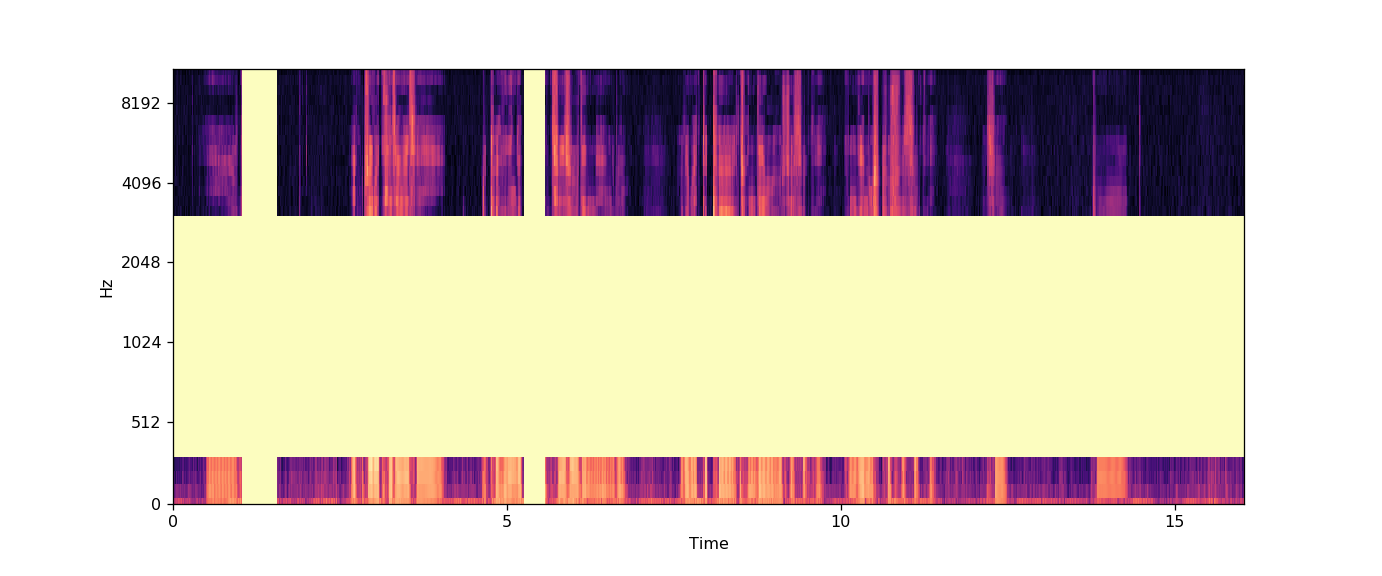

In [6]:
from espnet2.asr.specaug.specaug import SpecAug
import torch

specaug = SpecAug(apply_time_warp=True, time_warp_window=100, apply_freq_mask=True, apply_time_mask=True)
print(specaug)

S_dB_in = torch.unsqueeze(torch.from_numpy(S_dB.copy().T), 0)
specaug(S_dB_in)
S_dB_out = torch.squeeze(S_dB_in, 0).numpy().T

plt.figure()
librosa.display.specshow(S_dB_out, sr=sampling_rate, hop_length=hop_length, y_axis="mel", x_axis="time")

